<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/Gabriel_Image_Recognition_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supervised classification problem where we use the positions and shades of grayscale pixels to predict if an image contains either a cat or a dog.

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
url1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
!curl -o 'x' {url1}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  64.6M      0  0:00:03  0:00:03 --:--:-- 64.6M


In [ ]:
!curl -o 'y' {url2}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   304k      0 --:--:-- --:--:-- --:--:--  304k


In [ ]:
!curl -o 'Dog' {url3}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60603  100 60603    0     0   329k      0 --:--:-- --:--:-- --:--:--  330k


In [ ]:
with open('x', 'rb') as file:
    xval = pickle.load(file)
xval.shape


(24946, 100, 100, 1)

In [ ]:
with open('y', 'rb') as file:
    yval = pickle.load(file)
yval[:10]

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
xscale = xval/255

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
xscale.shape

(24946, 100, 100, 1)

In [ ]:
len(yval)

24946

In [ ]:
yscale = np.array(yval)
yscale.shape

(24946,)

0


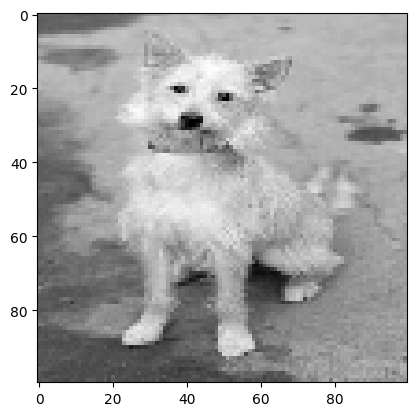

In [ ]:
plt.imshow(xscale[0], cmap = "gray");
print(yval[0])

1


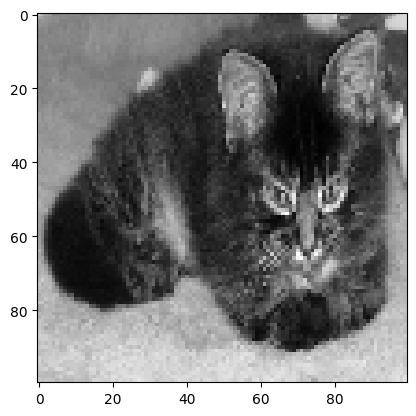

In [ ]:
plt.imshow(xscale[1], cmap = "gray");
print(yval[1])

1


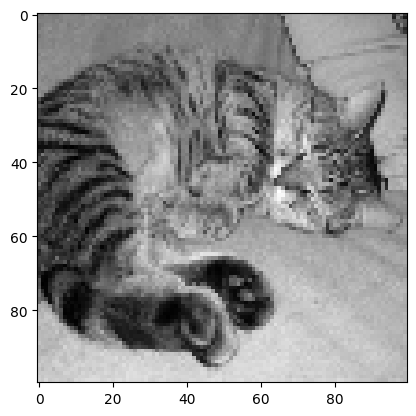

In [ ]:
plt.imshow(xscale[2], cmap = "gray");
print(yval[2])

0


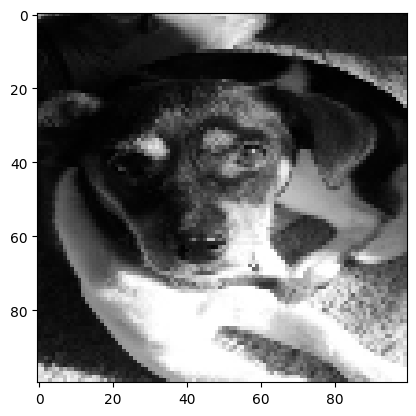

In [ ]:
plt.imshow(xscale[3], cmap = 'gray');
print(yval[3])

0


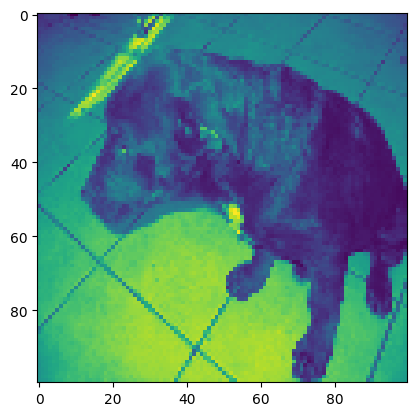

In [ ]:
plt.imshow(xscale[4]);
print(yval[4])

0


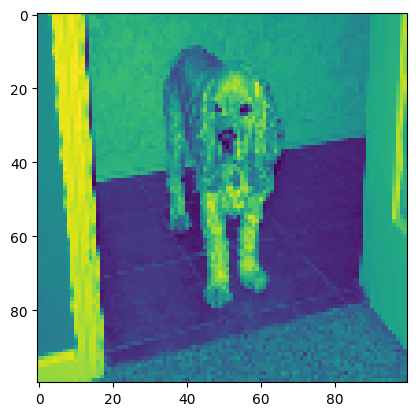

In [ ]:
plt.imshow(xscale[5]);
print(yval[5])

0


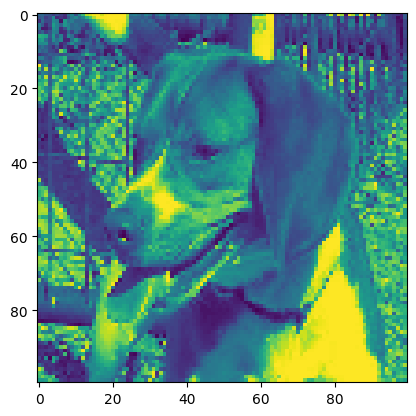

In [ ]:
plt.imshow(xscale[6]);
print(yval[6])

## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.25, random_state=42)

In [ ]:
(
  type(x_train),
  type(y_train),
  type(x_test),
  type(y_test)
)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
(
  x_train.shape,
  y_train.shape,
  x_test.shape,
  y_test.shape
)

((18709, 100, 100, 1), (18709,), (6237, 100, 100, 1), (6237,))

1


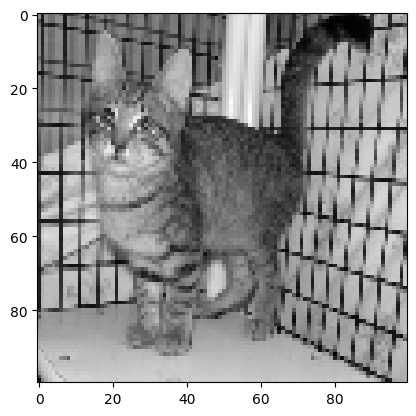

In [ ]:
plt.imshow(x_train[0], cmap = 'gray')
print(y_train[0])

In [ ]:
model = Sequential()

In [ ]:
# Define input layer
model.add(
  Input(
    shape=x_train.shape[1:],
    name="model_input",
  ),
)

In [ ]:
# Define first hidden layer
model.add(
  Conv2D(
    name = "Conv1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

In [ ]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "Conv2",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

In [ ]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid',
  )
)

In [ ]:
# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)

In [ ]:
# Fit model
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 447s 759ms/step - accuracy: 0.5653 - loss: 0.6755
Epoch 2/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 500s 758ms/step - accuracy: 0.7210 - loss: 0.5504
Epoch 3/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 508s 768ms/step - accuracy: 0.7781 - loss: 0.4761
Epoch 4/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 446s 763ms/step - accuracy: 0.8025 - loss: 0.4312
Epoch 5/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 501s 761ms/step - accuracy: 0.8134 - loss: 0.4083
Epoch 6/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 502s 762ms/step - accuracy: 0.8288 - loss: 0.3810
Epoch 7/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 500s 759ms/step - accuracy: 0.8511 - loss: 0.3421
Epoch 8/8
585/585 ━━━━━━━━━━━━━━━━━━━━ 445s 760ms/step - accuracy: 0.8632 - loss: 0.3191


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

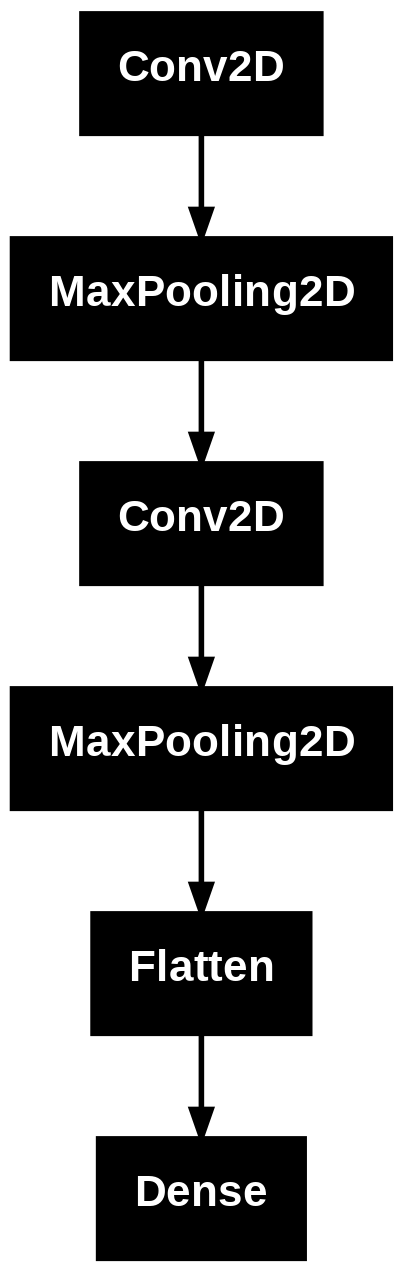

In [ ]:
plot_model(model)

In [ ]:
# Change test set to 4-D
x_test2 = x_test.reshape( x_test.shape + (1,) )

# Evaluate model
val_loss, val_acc = model.evaluate(x_test2, y_test)
print(val_loss)
print(val_acc)

195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - accuracy: 0.7926 - loss: 0.4599
0.458022803068161
0.7954144477844238


In [ ]:
predictions = model.predict(x_test)
print(predictions[0])

195/195 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step
[0.14423767]


In [ ]:
[ print(f"{k}: {x:.2f}") for k, x in enumerate(predictions[0]*100) ]

0: 14.42


[None]

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions.shape

(6237, 1)

In [ ]:
prelist = []
for a in list(predictions):
  prelist.append(float(a[0]))
prelist[:10]

[0.1442376673221588,
 0.7198891639709473,
 0.982362687587738,
 0.7613077759742737,
 0.29958370327949524,
 0.003913987427949905,
 0.9931575655937195,
 0.6136543154716492,
 0.8955609202384949,
 0.8346434235572815]

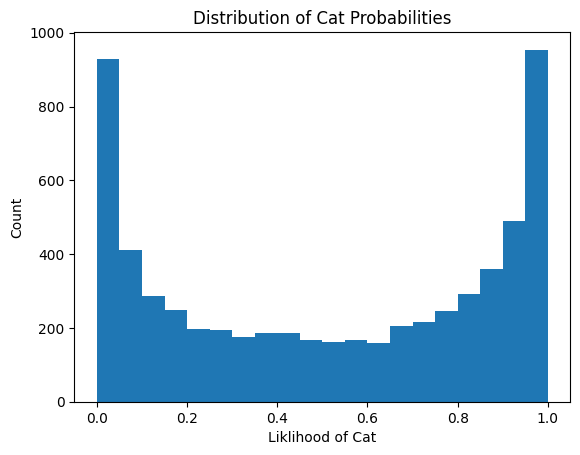

In [ ]:
plt.hist(prelist, bins=20);
plt.title('Distribution of Cat Probabilities');
plt.xlabel('Liklihood of Cat');
plt.ylabel('Count');

In [ ]:
from PIL import Image

In [ ]:
doggy = Image.open('/content/Dog')

In [ ]:
type(doggy)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
squishy = doggy.resize((100, 100), Image.Resampling.LANCZOS)
squishy.size

(100, 100)

In [ ]:
type(squishy)

PIL.Image.Image

In [ ]:
squishy_array = np.array(squishy)
type(squishy_array)

numpy.ndarray

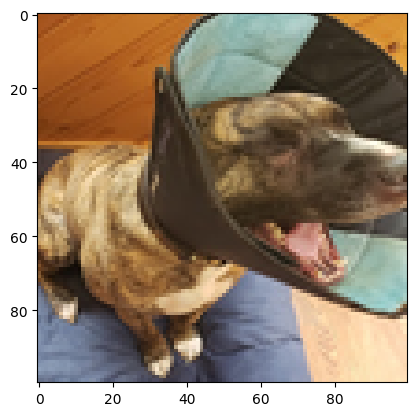

In [ ]:
plt.imshow(squishy_array);

In [ ]:
squishy_array.shape

(100, 100, 3)

In [ ]:
import cv2

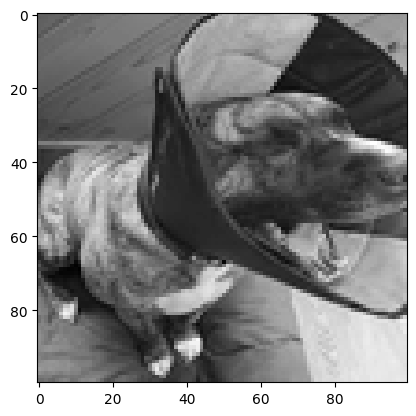

In [ ]:
agray = cv2.cvtColor(squishy_array, cv2.COLOR_RGB2GRAY)
plt.imshow(agray, cmap = 'gray');

In [ ]:
type(agray)

numpy.ndarray

In [ ]:
agray.shape

(100, 100)

In [ ]:
agray2 = agray.reshape((1,100,100,1))
agray2.shape

(1, 100, 100, 1)

In [ ]:
def read_n_run(path):
  img = Image.open(path)
  squish = img.resize((100, 100), Image.Resampling.LANCZOS)
  arr = np.array(squish)
  gray = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
  shaped = gray.reshape((1,100,100,1))
  return shaped

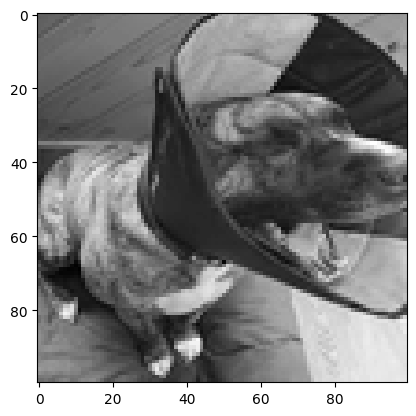

In [ ]:
d = read_n_run('/content/Dog')
plt.imshow(d[0], cmap = 'gray')

In [ ]:
p = model.predict(d)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [ ]:
p

array([[0.]], dtype=float32)

## Communication of Results



Different runs of the same code resulted in:
- 80-90% acuracy in training
- 75-79% acuracy in testing
- predicting either dog or cat for the final image

The overall acuracy from this method is consistently high across 4 tests but I can only imagine how it makes decisions.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.